# 20 - Random Forests Classifier

*Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.*

*The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.*

Step-1: Select random K data points from the training set.

Step-2: Build the decision trees associated with the selected data points (Subsets).

Step-3: Choose the number N for decision trees that you want to build.

Step-4: Repeat Step 1 & 2.

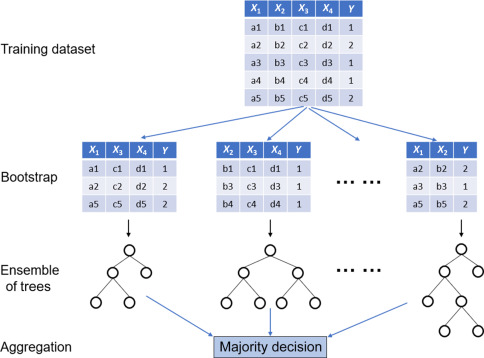

# Get and Prepare Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Get dataset 
df = pd.read_csv("diabetes.csv")
data = df.copy()

# Clear null values
data = data.dropna()

# Declare dependent and independent variables
X = data.drop(["Outcome"],axis=1)
y = data["Outcome"]

# Split train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [2]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

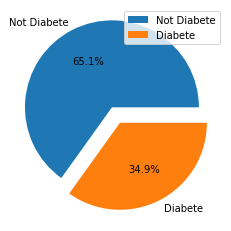

In [3]:
labels = ["Not Diabete","Diabete"]
plt.pie(x=data["Outcome"].value_counts(),labels=labels,explode=(0.1,0.1),autopct='%1.1f%%');
plt.legend()
plt.show()

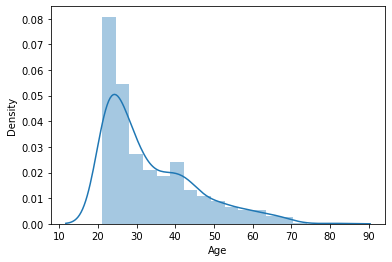

In [4]:
sns.distplot(data["Age"]);

# Import the Model

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Prediction

Test Accuracy Score : 0.75


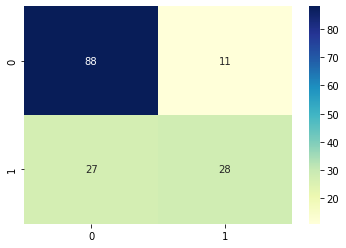

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_pred = rf_model.predict(X_test)
print("Test Accuracy Score : %.2f" % (accuracy_score(y_test,y_pred)))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="YlGnBu");

# Model Tuning with GridSearchCv

In [11]:
from sklearn.model_selection import GridSearchCV

# n_estimators --> Number of trees
# max_features --> number of features(independent var.) that be chosen randomly(x0,x2)(x1,x3)(x2,x4)

rf = RandomForestClassifier()
rf_params = {"max_depth":[2,3,4,5],
            "n_estimators":[100,200,300],
            "min_samples_split":[2,3,5],
            "max_features":[2,3]}

rf_cv = GridSearchCV(rf,rf_params,cv=10).fit(X_train,y_train)

In [12]:
rf_cv.best_params_

{'max_depth': 4,
 'max_features': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

# Model Tuning

In [14]:
rf_tuned = RandomForestClassifier(max_depth=4,max_features=2,
                                 min_samples_split=5,
                                 n_estimators=100).fit(X_train,y_train)

y_pred_tuned = rf_tuned.predict(X_test)
print("Tuned Test Accuracy Score : %.2f" % (accuracy_score(y_test,y_pred_tuned)))

Tuned Test Accuracy Score : 0.75


# Visualize the some trees on tuned model

In [17]:
# Extract the features names
feature_names = []
for i in range(len(data.columns)):
    if data.columns[i] != "Outcome":
        feature_names.append(data.columns[i])
            
print(feature_names)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


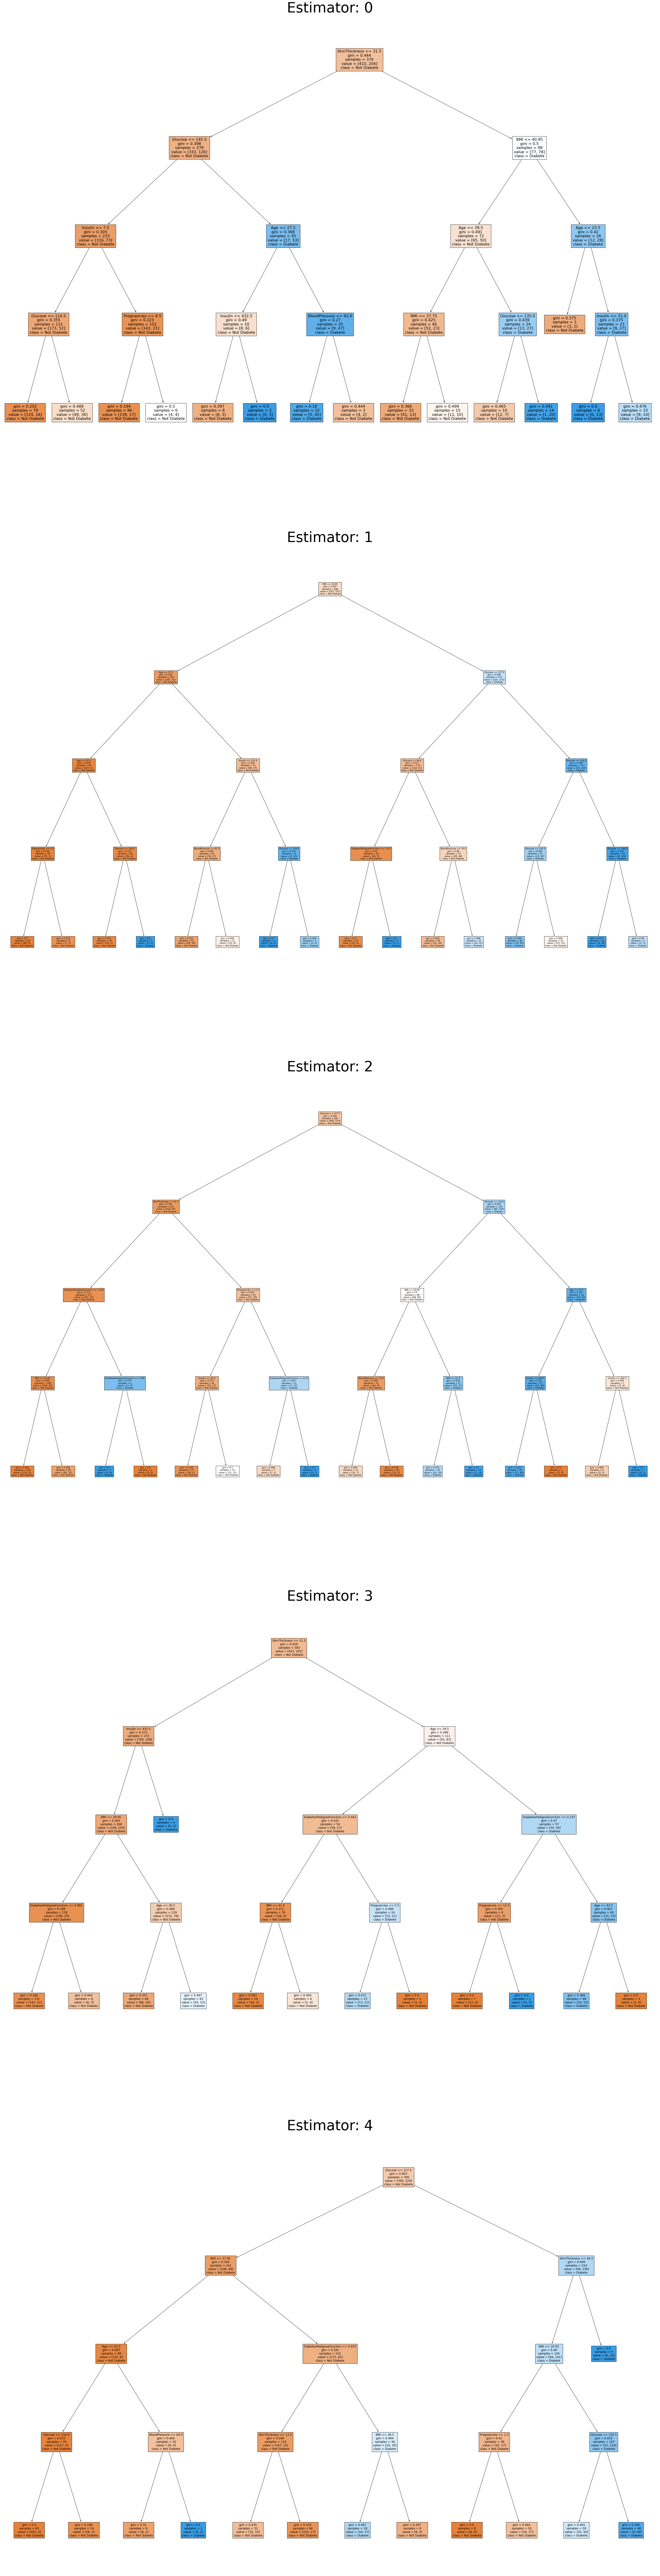

In [36]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 5,ncols = 1,figsize = (50,200))
for i in range(5):
    tree.plot_tree(rf_tuned.estimators_[i],feature_names=feature_names,class_names=["Not Diabete","Diabete"],ax=axes[i],filled=True)
    axes[i].set_title('Estimator: ' + str(i), fontsize = 60)